In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/mofrankhu/Work/data/20200703-timsTOF-200ng/feature.csv')

In [3]:
df.columns

Index(['Peptide', 'Quality', 'Significance', 'm/z', 'RT range', ' 1/k0 Range',
       'z', 'Avg. Area', 'Sample 1 m/z', 'Sample 1 RT mean',
       'Sample 1 Normalized Area', 'Sample 2 m/z', 'Sample 2 RT mean',
       'Sample 2 Normalized Area', 'Sample 3 m/z', 'Sample 3 RT mean',
       'Sample 3 Normalized Area', 'Sample 4 m/z', 'Sample 4 RT mean',
       'Sample 4 Normalized Area', 'Sample 5 m/z', 'Sample 5 RT mean',
       'Sample 5 Normalized Area', 'Sample 6 m/z', 'Sample 6 RT mean',
       'Sample 6 Normalized Area', 'Sample 7 m/z', 'Sample 7 RT mean',
       'Sample 7 Normalized Area', 'Sample 8 m/z', 'Sample 8 RT mean',
       'Sample 8 Normalized Area', 'Sample Profile (Ratio)',
       '92 Normalized Area', '953 Normalized Area', '407 Normalized Area',
       '408 Normalized Area', '588 Normalized Area', '589 Normalized Area',
       '585 Normalized Area', '586 Normalized Area', 'Group Profile (Ratio)',
       'RT mean', 'Id Count', 'Accession', 'PTM'],
      dtype='object')

In [4]:
matrix = df.loc[:, ['Peptide', '92 Normalized Area', '953 Normalized Area', '407 Normalized Area',
       '408 Normalized Area', '588 Normalized Area', '589 Normalized Area',
       '585 Normalized Area', '586 Normalized Area',]]

In [5]:
import seaborn as sns


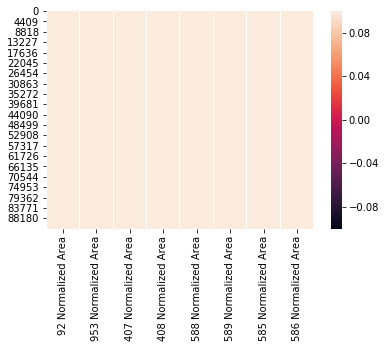

In [6]:
import numpy as np
# not useful, need optimize here
sns.heatmap(matrix.iloc[:,1:].apply(np.log10))

In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# process log10 nan problem
# may extend to Z-score here

X = matrix.iloc[:,1:].apply(lambda x: x+1).apply(np.log10).transpose()

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [8]:
X_r

array([[  70.28720444,  102.81423026],
       [ 276.74378726,   19.6026088 ],
       [ -99.2530043 ,  133.94748695],
       [-103.55690454,  127.12241251],
       [ -37.63220863,  -94.03805747],
       [ -39.35229945,  -94.65336679],
       [ -34.35496261,  -94.2054268 ],
       [ -32.88161217, -100.58988746]])

In [9]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.4039962  0.30810061]


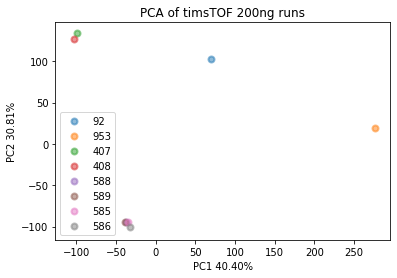

In [17]:
import matplotlib.pyplot as plt

plt.figure()
lw = 2

target_name = list(matrix.columns)[1:]
# print(target_name[1:])
# print(pca.explained_variance_ratio_[0], )

# plot each point with one line, to use different color
# could use `bokeh` to create interactive plot

for i in range(len(X_r)):
    plt.scatter(X_r[i][0], X_r[i][1], lw=lw, alpha=0.5, label=target_name[i].split(' ')[0])
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of timsTOF 200ng runs')
plt.xlabel('PC1 {:.2%}'.format(float(pca.explained_variance_ratio_[0])))
plt.ylabel('PC2 {:.2%}'.format(float(pca.explained_variance_ratio_[1])))

plt.show()